In [ ]:
!pip install ultralytics==8.0.196

In [ ]:
from IPython import display
display.clear_output()

from PIL import Image

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/107.7 GB disk)


In [36]:
#function to run inference
def run_inference_on_images(image_paths, model_path):
    model = YOLO(model_path, task='segment')

    # Process each image in the list
    for image_path in image_paths:
        # Run inference on the image
        results = model.predict(image_path, conf=0.5)

        # Display and save the results
        for r in results:
            im_array = r.plot()
            im = Image.fromarray(im_array[..., ::-1])
            display(im)
            #im.save('results.jpg') #to save image




In [45]:
# List of image paths
image_paths = ['bsf_test.jpg', 'jk_police_test.jpg', 'crpf_test.jpg']

## Inference with YoloV8s Segmentation Model


image 1/1 /content/bsf_test.jpg: 640x640 3 BSFs, 1927.4ms
Speed: 2.9ms preprocess, 1927.4ms inference, 26.9ms postprocess per image at shape (1, 3, 640, 640)


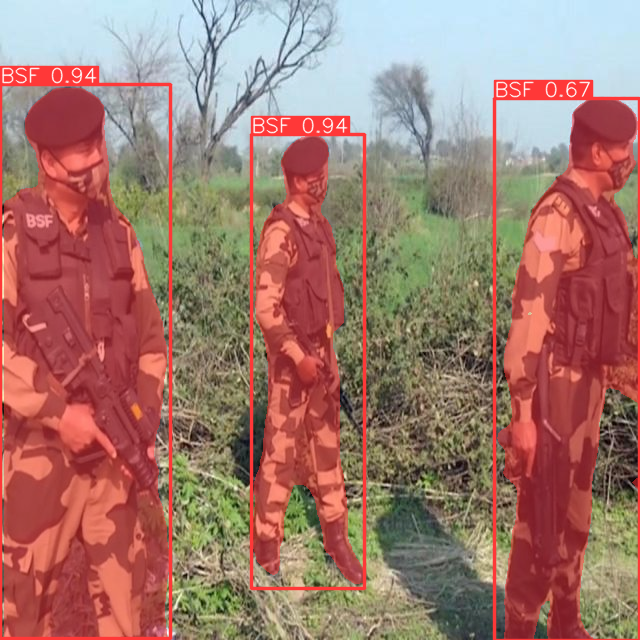


image 1/1 /content/jk_police_test.jpg: 640x640 11 JK_POLICEs, 2298.5ms
Speed: 3.2ms preprocess, 2298.5ms inference, 63.8ms postprocess per image at shape (1, 3, 640, 640)


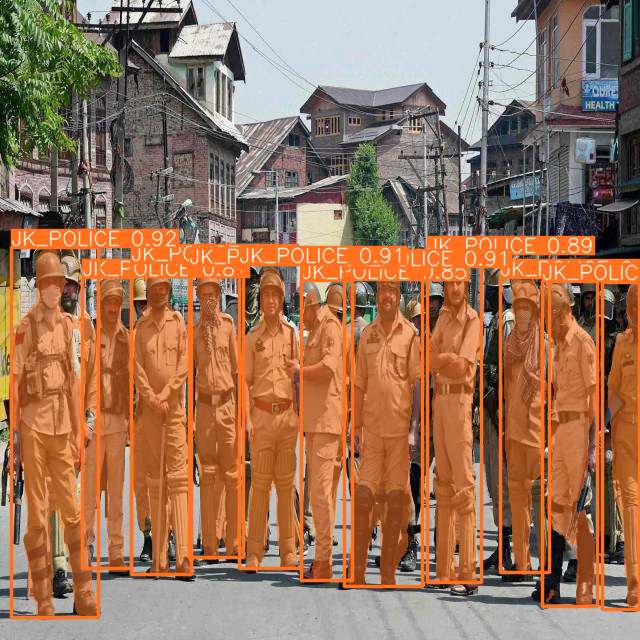


image 1/1 /content/crpf_test.jpg: 640x640 1 CRPF, 2459.2ms
Speed: 3.6ms preprocess, 2459.2ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


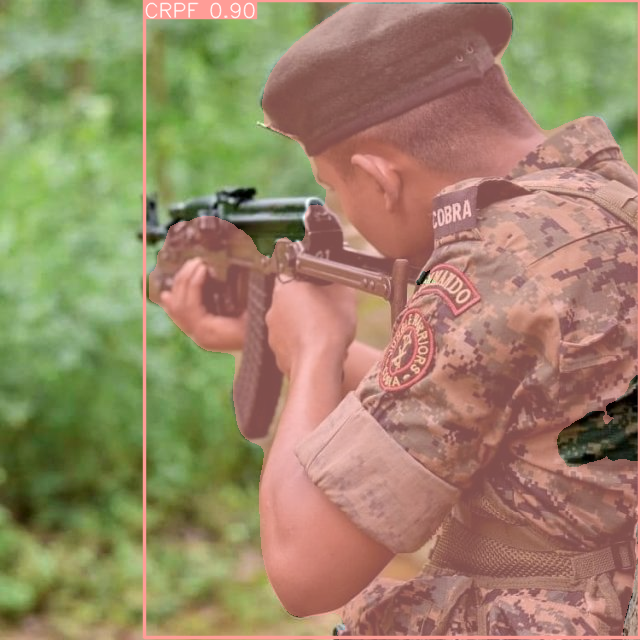

In [46]:
# Path to the model
model_path = 'best.pt'

# Call the function
run_inference_on_images(image_paths, model_path)

## Inference with tflite Models for Edge Deployment

Loading best_full_integer_quant.tflite for TensorFlow Lite inference...

image 1/1 /content/bsf_test.jpg: 640x640 3 BSFs, 1784.2ms
Speed: 2.6ms preprocess, 1784.2ms inference, 24.6ms postprocess per image at shape (1, 3, 640, 640)


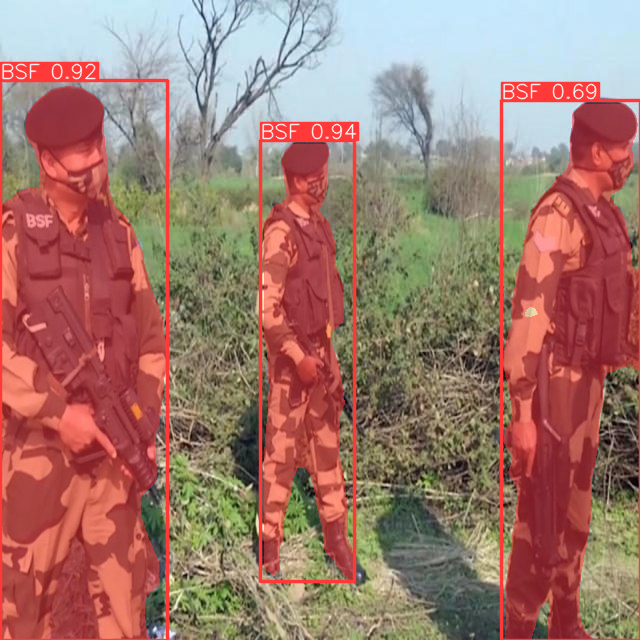


image 1/1 /content/jk_police_test.jpg: 640x640 12 JK_POLICEs, 1908.6ms
Speed: 2.8ms preprocess, 1908.6ms inference, 41.6ms postprocess per image at shape (1, 3, 640, 640)


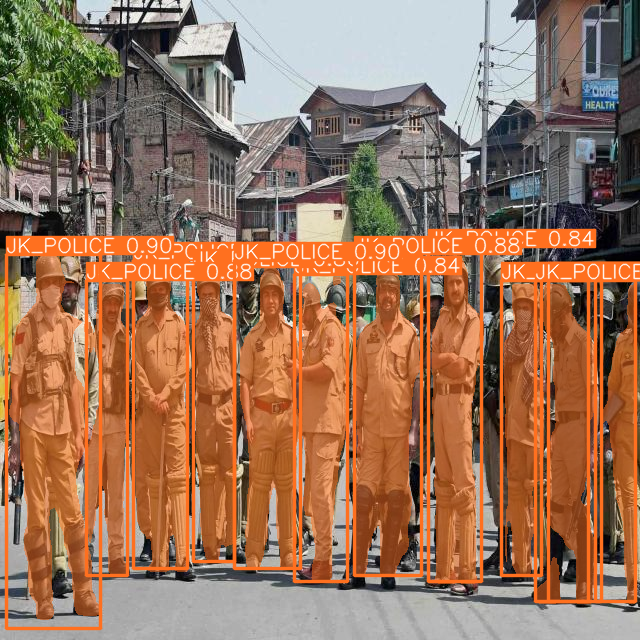


image 1/1 /content/crpf_test.jpg: 640x640 1 CRPF, 1941.5ms
Speed: 8.0ms preprocess, 1941.5ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)


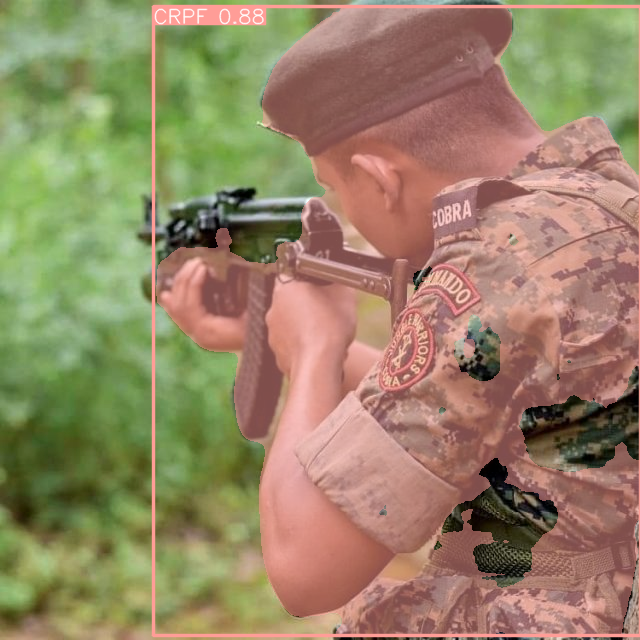

In [47]:
# Path to the model
model_path = 'best_full_integer_quant.tflite'

# Call the function
run_inference_on_images(image_paths, model_path)